In [18]:
import glob
import pandas as pd
import numpy as np
import torch
from torchvision.transforms import ToPILImage
from IPython.display import display
import os

In [2]:
# Pasta contendo os arquivos .npy
folder_path_1300 = 'E:/Dario_depth/depth/1300s/depth_cropped'

folder_path_1400 = 'E:/Dario_depth/depth/1400s_new/depth/val/images'

folder_path_1500 = 'E:/Dario_depth/depth/1500s_new/depth/val/images'

# Obter a lista de caminhos dos arquivos .npy usando glob
file_paths_1300 = glob.glob(folder_path_1300 + '/*.npy')

# Obter a lista de caminhos dos arquivos .npy usando glob
file_paths_1400 = glob.glob(folder_path_1400 + '/*.npy')

# Obter a lista de caminhos dos arquivos .npy usando glob
file_paths_1500 = glob.glob(folder_path_1500 + '/*.npy')


In [4]:

def get_image_ids(file_paths):

    image_ids = []


    for file_path in file_paths:
        image_id = file_path.split('\\')[-1]

        image_id = image_id.split('.')[0]

        image_ids.append(image_id)

    return image_ids


def create_df_from_image_ids(image_ids, type):

    file_names = pd.DataFrame(image_ids, columns=['image_id'])

    file_names['npy_image']    = file_names['image_id']+ '.npy'

    file_names['binary_image'] = file_names['image_id']+ '_pmask.png'

    file_names['splash_image'] = 'splash_' + file_names['image_id'] + '.png'

    file_names['type'] = type

    return file_names



def create_file_names_df(file_paths, type):

    image_ids = get_image_ids(file_paths)

    df = create_df_from_image_ids(image_ids,
                                  type = type)
    

    return df



In [5]:
file_names = create_file_names_df(file_paths_1300, 1300)

file_names = pd.concat([file_names, create_file_names_df(file_paths_1400, 1400)], ignore_index=True)

file_names = pd.concat([file_names, create_file_names_df(file_paths_1500, 1500)], ignore_index=True)



In [6]:
file_names

,image_id,npy_image,binary_image,splash_image,type
0,calf_id_1387_20210621_743_depth_0042,calf_id_1387_20210621_743_depth_0042.npy,calf_id_1387_20210621_743_depth_0042_pmask.png,splash_calf_id_1387_20210621_743_depth_0042.png,1300
1,calf_id_1387_20210621_743_depth_0057,calf_id_1387_20210621_743_depth_0057.npy,calf_id_1387_20210621_743_depth_0057_pmask.png,splash_calf_id_1387_20210621_743_depth_0057.png,1300
2,calf_id_1387_20210621_743_depth_0059,calf_id_1387_20210621_743_depth_0059.npy,calf_id_1387_20210621_743_depth_0059_pmask.png,splash_calf_id_1387_20210621_743_depth_0059.png,1300
3,calf_id_1387_20210621_743_depth_0061,calf_id_1387_20210621_743_depth_0061.npy,calf_id_1387_20210621_743_depth_0061_pmask.png,splash_calf_id_1387_20210621_743_depth_0061.png,1300
4,calf_id_1387_20210621_743_depth_0064,calf_id_1387_20210621_743_depth_0064.npy,calf_id_1387_20210621_743_depth_0064_pmask.png,splash_calf_id_1387_20210621_743_depth_0064.png,1300
...,...,...,...,...,...
70679,calf_id_1599_20220207_408_depth_0353,calf_id_1599_20220207_408_depth_0353.npy,calf_id_1599_20220207_408_depth_0353_pmask.png,splash_calf_id_1599_20220207_408_depth_0353.png,1500
70680,calf_id_1599_20220207_408_depth_0361,calf_id_1599_20220207_408_depth_0361.npy,calf_id_1599_20220207_408_depth_0361_pmask.png,splash_calf_id_1599_20220207_408_depth_0361.png,1500
70681,calf_id_1599_20220207_408_depth_0383,calf_id_1599_20220207_408_depth_0383.npy,calf_id_1599_20220207_408_depth_0383_pmask.png,splash_calf_id_1599_20220207_408_depth_0383.png,1500
70682,calf_id_1599_20220207_408_depth_0390,calf_id_1599_20220207_408_depth_0390.npy,calf_id_1599_20220207_408_depth_0390_pmask.png,splash_calf_id_1599_20220207_408_depth_0390.png,1500


In [20]:
def add_prefix_based_on_type_binary(row):
    prefix = ""

    if row['type'] == 1300:
        prefix = "E:/Dario_depth/masks/1300s/binary/"
    elif row['type'] == 1400:
        prefix = "E:/Dario_depth/masks/1400s/binary/"
    elif row['type'] == 1500:
        prefix = "E:/Dario_depth/masks/1500s/binary/"

    return prefix + row['binary_image']

def add_prefix_based_on_type_npy(row):
    prefix = ""

    if row['type'] == 1300:
        prefix = 'E:/Dario_depth/depth/1300s/depth_cropped/'
    elif row['type'] == 1400:
        prefix = 'E:/Dario_depth/depth/1400s_new/depth/val/images/'
    elif row['type'] == 1500:
        prefix = 'E:/Dario_depth/depth/1500s_new/depth/val/images/'

    return prefix + row['npy_image']



In [21]:
file_names['binary_image'] = file_names.apply(add_prefix_based_on_type_binary, axis=1)
file_names['npy_image'] = file_names.apply(add_prefix_based_on_type_npy, axis=1)

In [22]:
file_names

,image_id,npy_image,binary_image,splash_image,type
0,calf_id_1387_20210621_743_depth_0042,E:/Dario_depth/depth/1300s/depth_cropped/calf_...,E:/Dario_depth/masks/1300s/binary/calf_id_1387...,splash_calf_id_1387_20210621_743_depth_0042.png,1300
1,calf_id_1387_20210621_743_depth_0057,E:/Dario_depth/depth/1300s/depth_cropped/calf_...,E:/Dario_depth/masks/1300s/binary/calf_id_1387...,splash_calf_id_1387_20210621_743_depth_0057.png,1300
2,calf_id_1387_20210621_743_depth_0059,E:/Dario_depth/depth/1300s/depth_cropped/calf_...,E:/Dario_depth/masks/1300s/binary/calf_id_1387...,splash_calf_id_1387_20210621_743_depth_0059.png,1300
3,calf_id_1387_20210621_743_depth_0061,E:/Dario_depth/depth/1300s/depth_cropped/calf_...,E:/Dario_depth/masks/1300s/binary/calf_id_1387...,splash_calf_id_1387_20210621_743_depth_0061.png,1300
4,calf_id_1387_20210621_743_depth_0064,E:/Dario_depth/depth/1300s/depth_cropped/calf_...,E:/Dario_depth/masks/1300s/binary/calf_id_1387...,splash_calf_id_1387_20210621_743_depth_0064.png,1300
...,...,...,...,...,...
70679,calf_id_1599_20220207_408_depth_0353,E:/Dario_depth/depth/1500s_new/depth/val/image...,E:/Dario_depth/masks/1500s/binary/calf_id_1599...,splash_calf_id_1599_20220207_408_depth_0353.png,1500
70680,calf_id_1599_20220207_408_depth_0361,E:/Dario_depth/depth/1500s_new/depth/val/image...,E:/Dario_depth/masks/1500s/binary/calf_id_1599...,splash_calf_id_1599_20220207_408_depth_0361.png,1500
70681,calf_id_1599_20220207_408_depth_0383,E:/Dario_depth/depth/1500s_new/depth/val/image...,E:/Dario_depth/masks/1500s/binary/calf_id_1599...,splash_calf_id_1599_20220207_408_depth_0383.png,1500
70682,calf_id_1599_20220207_408_depth_0390,E:/Dario_depth/depth/1500s_new/depth/val/image...,E:/Dario_depth/masks/1500s/binary/calf_id_1599...,splash_calf_id_1599_20220207_408_depth_0390.png,1500


In [26]:
import cv2
import pandas as pd
import numpy as np
import random
import pdb


def find_largest_bounding_box(image_paths, sample_size=100):
    # Amostragem aleatória
    random_sample = random.sample(image_paths, min(len(image_paths), sample_size))

    # Inicializar variáveis para o tamanho máximo da bounding box
    max_width = 0
    max_height = 0

    for image_path in random_sample:
        # Carregar a imagem binária
        imagem_binaria = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

        # Encontrar o centroide da parte branca
        m = cv2.moments(imagem_binaria)

        # Verificar se o momento de área não é igual a zero (evitar divisão por zero)
        if m["m00"] != 0:
            centroide_x = int(m["m10"] / m["m00"])
            centroide_y = int(m["m01"] / m["m00"])
        else:
            continue  # Ignorar essa imagem e passar para a próxima

        # Encontrar a bounding box da parte branca
        indices_pixels_brancos = np.where(imagem_binaria == 255)
        topo = np.min(indices_pixels_brancos[0])
        esquerda = np.min(indices_pixels_brancos[1])
        altura = np.max(indices_pixels_brancos[0]) - topo
        largura = np.max(indices_pixels_brancos[1]) - esquerda

        # Atualizar o tamanho máximo da bounding box
        max_width = max(max_width, largura)
        max_height = max(max_height, altura)

    return max_width, max_height

# Exemplo de uso:
# Suponha que suas imagens estejam em uma coluna chamada 'binary_image' no DataFrame 'df'
max_width, max_height = find_largest_bounding_box(list(file_names['binary_image']), sample_size=100)

print('Largura máxima da bounding box:', max_width)
print('Altura máxima da bounding box:', max_height)

Largura máxima da bounding box: 488
Altura máxima da bounding box: 295


In [27]:
import cv2
import numpy as np
from scipy.spatial.distance import cdist

def find_centroid(imagem_binaria):
    # Find the indices of the white pixels
    white_indices = np.where(imagem_binaria == 255)

    if len(white_indices[0]) == 0:
        return None, None  # No white pixels found

    # Calculate the centroid of the white pixels
    centroid_x = int(np.mean(white_indices[1]))
    centroid_y = int(np.mean(white_indices[0]))

    return centroid_x, centroid_y

def find_farthest_point(imagem_binaria):
    # Find the indices of the white pixels
    white_indices = np.where(imagem_binaria == 255)

    if len(white_indices[0]) == 0:
        return None  # No white pixels found

    # Calculate the centroid of the white pixels
    centroid_x = int(np.mean(white_indices[1]))
    centroid_y = int(np.mean(white_indices[0]))

    # Calculate the distances of each white pixel to the centroid
    distances_to_centroid = cdist([(centroid_x, centroid_y)], np.transpose(white_indices[::-1]))

    # Find the index of the farthest white pixel from the centroid
    farthest_index = np.argmax(distances_to_centroid)

    # Get the coordinates of the farthest point
    farthest_point = (white_indices[1][farthest_index], white_indices[0][farthest_index])

    return farthest_point


def rotate_image(imagem, angulo):
    # Obter o centro da imagem
    altura, largura = imagem.shape[:2]
    centro = (largura / 2, altura / 2)

    # Obter a matriz de rotação
    matriz_rotacao = cv2.getRotationMatrix2D(centro, angulo, 1.0)

    # Rotacionar a imagem
    imagem_rotacionada = cv2.warpAffine(imagem, matriz_rotacao, (largura, altura))

    return imagem_rotacionada

def calculate_centroid_and_farthest_point(image_path):
    # Carregar a imagem binária
    imagem_binaria = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Encontrar o centroide
    centroid_x, centroid_y = find_centroid(imagem_binaria)

    if centroid_x is None or centroid_y is None:
        print("No white pixels found in the image.")
        return

    # Encontrar o ponto mais distante do centroide
    farthest_point = find_farthest_point(imagem_binaria)

    if farthest_point is None:
        print("No white pixels found in the image.")
        return
    

    ponto1 = (centroid_x, centroid_y)
    ponto2 = farthest_point

    # Desenhe o centroide na imagem
    imagem_atual = cv2.cvtColor(imagem_binaria, cv2.COLOR_GRAY2BGR)
    cv2.circle(imagem_com_centroide, (centroid_x, centroid_y), 5, (0, 255, 0), -1)

    # Desenhe o ponto mais distante do centroide na imagem
    cv2.circle(imagem_atual, farthest_point, 5, (0, 0, 255), -1)

    # Desenhe uma seta do centroide até o ponto mais distante
    cv2.arrowedLine(imagem_atual, ponto1, ponto2, (255, 0, 0), 2)

    # salvar a imagem com o centroide, o ponto mais distante e a seta
    cv2.imwrite('original_atual.png', imagem_atual)

    # rotacionar a imagem para que o ponto mais distante fique na horizontal
    angulo = np.arctan2(ponto2[1] - ponto1[1], ponto2[0] - ponto1[0]) * 180 / np.pi
    imagem_rotacionada = rotate_image(imagem_atual, angulo)

    # salvar a imagem rotacionada
    cv2.imwrite('rotacionada_atual.png', imagem_rotacionada)



In [28]:
# Example usage:
image_path = 'E:/Dario_depth/masks/1500s/binary/'+'calf_id_1579_20220201_748_depth_0297_pmask.png'
# calculate_centroid_and_farthest_point(file_names['binary_image'][69000])

calculate_centroid_and_farthest_point(image_path)


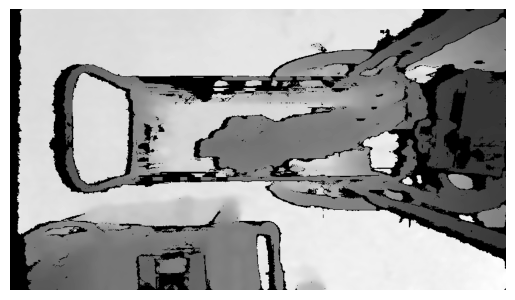

In [49]:
import numpy as np
import matplotlib.pyplot as plt  # Biblioteca opcional para exibir a imagem

# Carregar a imagem a partir do arquivo .npy
image_data = np.load(file_names['npy_image'][0])

# Exibir a imagem (opcional)
plt.imshow(image_data, cmap='gray')
plt.axis('off')  # Desativar os eixos
plt.show()

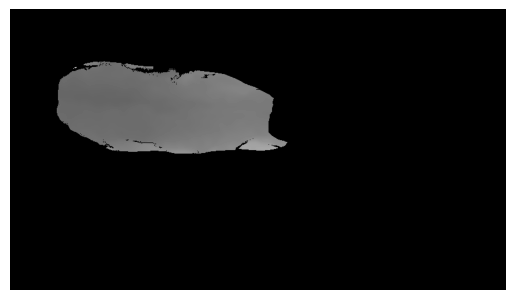

In [98]:


from PIL import Image  # Biblioteca para lidar com imagens em formato PNG

index = 9200

# Carregar as imagens a partir dos arquivos .npy
gray_image = np.load(file_names['npy_image'][index])

# Carregar a imagem binária em formato PNG
png_binary_image = Image.open(file_names['binary_image'][index])
binary_image_array = np.array(png_binary_image.convert("L"))  # Converter para escala de cinza

# Multiplicar as duas imagens para obter as partes brancas da imagem original
result_image = gray_image * (binary_image_array / 255)  # Normalizar para valores entre 0 e 1

# Exibir a imagem resultante
plt.imshow(result_image, cmap='gray')  # Usando a colormap 'gray' para exibir em escala de cinza
plt.axis('off')
plt.show()

In [107]:
import cv2
import numpy as np
from scipy.spatial.distance import cdist

def find_centroid(imagem_binaria):
    # Find the indices of the white pixels
    white_indices = np.where(imagem_binaria == 255)

    if len(white_indices[0]) == 0:
        return None, None  # No white pixels found

    # Calculate the centroid of the white pixels
    centroid_x = int(np.mean(white_indices[1]))
    centroid_y = int(np.mean(white_indices[0]))

    return centroid_x, centroid_y

def find_farthest_point(imagem_binaria):
    # Find the indices of the white pixels
    white_indices = np.where(imagem_binaria == 255)

    if len(white_indices[0]) == 0:
        return None  # No white pixels found

    # Calculate the centroid of the white pixels
    centroid_x = int(np.mean(white_indices[1]))
    centroid_y = int(np.mean(white_indices[0]))

    # Calculate the distances of each white pixel to the centroid
    distances_to_centroid = cdist([(centroid_x, centroid_y)], np.transpose(white_indices[::-1]))

    # Find the index of the farthest white pixel from the centroid
    farthest_index = np.argmax(distances_to_centroid)

    # Get the coordinates of the farthest point
    farthest_point = (white_indices[1][farthest_index], white_indices[0][farthest_index])

    return farthest_point


def rotate_image(imagem, angulo):
    # Obter o centro da imagem
    altura, largura = imagem.shape[:2]
    centro = (largura / 2, altura / 2)

    # Obter a matriz de rotação
    matriz_rotacao = cv2.getRotationMatrix2D(centro, angulo, 1.0)

    # Rotacionar a imagem
    imagem_rotacionada = cv2.warpAffine(imagem, matriz_rotacao, (largura, altura))

    return imagem_rotacionada



def calculate_centroid_and_farthest_point(args, save_folder):
    binary_png_path, image_id = args

    # Carregar a imagem binária
    binary_image = cv2.imread(binary_png_path, cv2.IMREAD_GRAYSCALE)

    # Encontrar o centroide
    centroid_x, centroid_y = find_centroid(binary_image)

    if centroid_x is None or centroid_y is None:
        cv2.imwrite(f'{save_folder}/rotated_{image_id}.png', binary_image)
        return None

    # Encontrar o ponto mais distante do centroide
    farthest_point = find_farthest_point(binary_image)

    if farthest_point is None:
        cv2.imwrite(f'{save_folder}/rotated_{image_id}.png', binary_image)
        return None
    
    ponto1 = (centroid_x, centroid_y)
    ponto2 = farthest_point

    # Calcular o ângulo de rotação
    angulo = np.arctan2(ponto2[1] - ponto1[1], ponto2[0] - ponto1[0]) * 180 / np.pi

    # Rotacionar a matriz resultante da multiplicação
    rotated_result = rotate_image(binary_image, angulo)

    # Salvar o resultado em um arquivo PNG
    cv2.imwrite(f'{save_folder}/rotated_{image_id}.png', rotated_result)

    return angulo

In [86]:

index = 20

imagem_npy = calculate_centroid_and_farthest_point((file_names['npy_image'][index], file_names['binary_image'][index], "teste"))

# Exibir a imagem resultante
plt.imshow(imagem_npy, cmap='gray')  # Usando a colormap 'gray' para exibir em escala de cinza
plt.axis('off')
plt.show()

TypeError: calculate_centroid_and_farthest_point() missing 1 required positional argument: 'save_folder'

In [109]:
from joblib import Parallel, delayed

file_names_parte = file_names.iloc[:,:]

# Preparar uma lista de tuplas com os argumentos para cada arquivo
args_list = [( row['binary_image'], row['image_id']) for _, row in file_names_parte.iterrows()]

# Definir o número de núcleos a serem usados para a paralelização
num_cores = 4  # Por exemplo, use 4 núcleos

# Definir a pasta onde os arquivos serão salvos
save_folder = 'E:/rotacionados'

batch_size = 100  # Número de arquivos a serem processados por lote

processed_count = 0  # Inicializar o contador de arquivos processados


# Criar uma lista para armazenar os resultados de ângulo de rotação e image_id
results = []

# ...

for batch_start in range(0, len(args_list), batch_size):
    batch_args = args_list[batch_start:batch_start + batch_size]
    
    batch_results = Parallel(n_jobs=num_cores)(
        delayed(calculate_centroid_and_farthest_point)(args, save_folder) for args in batch_args
    )
    
    # Atualizar o contador e armazenar os resultados
    processed_count += len(batch_args)
    print(f"Processed {processed_count} files out of {len(args_list)}")
    
    # Adicionar os resultados do lote à lista de resultados
    for angulo, image_id in zip(batch_results, [args[1] for args in batch_args]):
        results.append({'image_id': image_id, 'angulo_rotacao': angulo})

# Criar um DataFrame a partir da lista de resultados
results_df = pd.DataFrame(results)

# Salvar o DataFrame em um arquivo CSV ou realizar outras operações com os resultados
results_df.to_csv('resultados_rotacao.csv', index=False)


Processed 100 files out of 70684
Processed 200 files out of 70684
Processed 300 files out of 70684
Processed 400 files out of 70684
Processed 500 files out of 70684
Processed 600 files out of 70684
Processed 700 files out of 70684
Processed 800 files out of 70684
Processed 900 files out of 70684
Processed 1000 files out of 70684
Processed 1100 files out of 70684
Processed 1200 files out of 70684
Processed 1300 files out of 70684
Processed 1400 files out of 70684
Processed 1500 files out of 70684
Processed 1600 files out of 70684
Processed 1700 files out of 70684
Processed 1800 files out of 70684
Processed 1900 files out of 70684
Processed 2000 files out of 70684
Processed 2100 files out of 70684
Processed 2200 files out of 70684
Processed 2300 files out of 70684
Processed 2400 files out of 70684
Processed 2500 files out of 70684
Processed 2600 files out of 70684
Processed 2700 files out of 70684
Processed 2800 files out of 70684
Processed 2900 files out of 70684
Processed 3000 files ou

In [114]:
# Obter a lista de caminhos dos arquivos .npy usando glob
imagens_rotacionadas = glob.glob(save_folder + '/*.png')
len(imagens_rotacionadas)

70684

In [115]:
imagens_rotacionadas

['E:/rotacionados\\rotated_calf_id_1387_20210621_743_depth_0042.png',
 'E:/rotacionados\\rotated_calf_id_1387_20210621_743_depth_0057.png',
 'E:/rotacionados\\rotated_calf_id_1387_20210621_743_depth_0059.png',
 'E:/rotacionados\\rotated_calf_id_1387_20210621_743_depth_0061.png',
 'E:/rotacionados\\rotated_calf_id_1387_20210621_743_depth_0064.png',
 'E:/rotacionados\\rotated_calf_id_1387_20210621_743_depth_0077.png',
 'E:/rotacionados\\rotated_calf_id_1387_20210621_743_depth_0088.png',
 'E:/rotacionados\\rotated_calf_id_1387_20210621_743_depth_0098.png',
 'E:/rotacionados\\rotated_calf_id_1387_20210621_743_depth_0101.png',
 'E:/rotacionados\\rotated_calf_id_1387_20210621_743_depth_0102.png',
 'E:/rotacionados\\rotated_calf_id_1387_20210621_743_depth_0125.png',
 'E:/rotacionados\\rotated_calf_id_1387_20210621_743_depth_0129.png',
 'E:/rotacionados\\rotated_calf_id_1387_20210621_743_depth_0142.png',
 'E:/rotacionados\\rotated_calf_id_1387_20210621_743_depth_0191.png',
 'E:/rotacionados\\r

In [122]:

def find_largest_bounding_box(image_paths, sample_size=100):
    # Amostragem aleatória
    random_sample = random.sample(image_paths, min(len(image_paths), sample_size))

    # Inicializar variáveis para o tamanho máximo da bounding box
    max_width = 0
    max_height = 0

    for image_path in random_sample:
        # Carregar a imagem binária
        imagem_binaria = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

        # Encontrar o centroide da parte branca
        m = cv2.moments(imagem_binaria)

        # Verificar se o momento de área não é igual a zero (evitar divisão por zero)
        if m["m00"] != 0:
            centroide_x = int(m["m10"] / m["m00"])
            centroide_y = int(m["m01"] / m["m00"])
        else:
            continue  # Ignorar essa imagem e passar para a próxima

        # Encontrar a bounding box da parte branca
        indices_pixels_brancos = np.where(imagem_binaria == 255)
        topo = np.min(indices_pixels_brancos[0])
        esquerda = np.min(indices_pixels_brancos[1])
        altura = np.max(indices_pixels_brancos[0]) - topo
        largura = np.max(indices_pixels_brancos[1]) - esquerda

        # Atualizar o tamanho máximo da bounding box
        max_width = max(max_width, largura)
        max_height = max(max_height, altura)

    return max_width, max_height

# Exemplo de uso:
# Suponha que suas imagens estejam em uma coluna chamada 'binary_image' no DataFrame 'df'
max_width, max_height = find_largest_bounding_box(list(imagens_rotacionadas[50000:]), sample_size=2500)

print('Largura máxima da bounding box:', max_width)
print('Altura máxima da bounding box:', max_height)

Largura máxima da bounding box: 634
Altura máxima da bounding box: 415


In [146]:
import cv2
import numpy as np

def create_and_save_bounding_box(image_path, altura_bounding_box, largura_bounding_box):
    # Carregar a imagem binária
    imagem_binaria = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Encontrar o centroide da parte branca
    m = cv2.moments(imagem_binaria)
    centroide_x = int(m["m10"] / m["m00"])
    centroide_y = int(m["m01"] / m["m00"])

    # Calcular os limites da bounding box com base no centroide
    topo = centroide_y - altura_bounding_box // 2
    base = topo + altura_bounding_box
    esquerda = centroide_x - largura_bounding_box // 2
    direita = esquerda + largura_bounding_box

    # Certificar-se de que os limites estão dentro dos limites da imagem
    topo = max(0, topo)
    base = min(imagem_binaria.shape[0], base)
    esquerda = max(0, esquerda)
    direita = min(imagem_binaria.shape[1], direita)

    # Criar uma imagem preta do tamanhso da bounding box desejada
    imagem_recortada = np.zeros((altura_bounding_box, largura_bounding_box), dtype=np.uint8)

    # Copiar a região recortada da imagem original para a imagem preta
    recorte_altura = base - topo
    recorte_largura = direita - esquerda
    imagem_recortada[0:recorte_altura, 0:recorte_largura] = imagem_binaria[topo:base, esquerda:direita]


    # Salvar a imagem recortada
    nome_saida = 'teste_cropped.png'
    cv2.imwrite(nome_saida, imagem_recortada)


# Exemplo de uso:
caminho_imagem = imagens_rotacionadas[55000] # 'data/imagens/rotacionadas/rotacionada_0.png
caminho_imagem = 'E:/rotacionados/rotated_calf_id_1595_20220125_756_depth_0509.png'
altura_bounding_box = 250
largura_bounding_box = 500

create_and_save_bounding_box(caminho_imagem, altura_bounding_box, largura_bounding_box)


In [117]:
list(imagens_rotacionadas)

['E:/rotacionados\\rotated_calf_id_1387_20210621_743_depth_0042.png',
 'E:/rotacionados\\rotated_calf_id_1387_20210621_743_depth_0057.png',
 'E:/rotacionados\\rotated_calf_id_1387_20210621_743_depth_0059.png',
 'E:/rotacionados\\rotated_calf_id_1387_20210621_743_depth_0061.png',
 'E:/rotacionados\\rotated_calf_id_1387_20210621_743_depth_0064.png',
 'E:/rotacionados\\rotated_calf_id_1387_20210621_743_depth_0077.png',
 'E:/rotacionados\\rotated_calf_id_1387_20210621_743_depth_0088.png',
 'E:/rotacionados\\rotated_calf_id_1387_20210621_743_depth_0098.png',
 'E:/rotacionados\\rotated_calf_id_1387_20210621_743_depth_0101.png',
 'E:/rotacionados\\rotated_calf_id_1387_20210621_743_depth_0102.png',
 'E:/rotacionados\\rotated_calf_id_1387_20210621_743_depth_0125.png',
 'E:/rotacionados\\rotated_calf_id_1387_20210621_743_depth_0129.png',
 'E:/rotacionados\\rotated_calf_id_1387_20210621_743_depth_0142.png',
 'E:/rotacionados\\rotated_calf_id_1387_20210621_743_depth_0191.png',
 'E:/rotacionados\\r